In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('../Data-Analysis-Project/datasets/P4-Demographic-Data.csv')
df.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [79]:
df.shape

(195, 5)

In [80]:
df.columns

Index(['Country Name', 'Country Code', 'Birth rate', 'Internet users',
       'Income Group'],
      dtype='object')

In [81]:
df.columns = ['CountryName', 'CountryCode', 'BirthRate', 'InternetUsers',
       'IncomeGroup']

In [82]:
df.columns

Index(['CountryName', 'CountryCode', 'BirthRate', 'InternetUsers',
       'IncomeGroup'],
      dtype='object')

In [83]:
df['IncomeGroup'].unique()

array(['High income', 'Low income', 'Upper middle income',
       'Lower middle income'], dtype=object)

In [84]:
df['IncomeGroup'].value_counts()

IncomeGroup
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

<Axes: xlabel='IncomeGroup'>

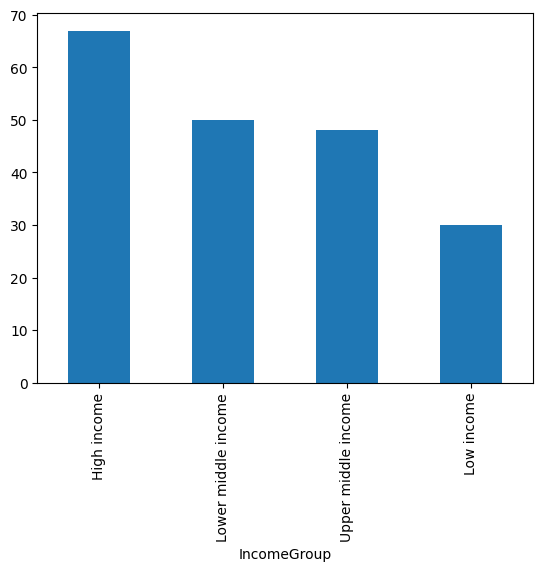

In [86]:
df['IncomeGroup'].value_counts().plot(kind='bar')

<Axes: ylabel='IncomeGroup'>

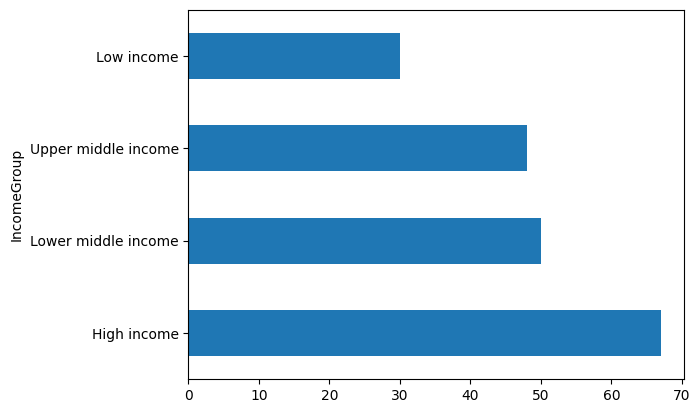

In [87]:
df['IncomeGroup'].value_counts().plot(kind='barh')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CountryName    195 non-null    object 
 1   CountryCode    195 non-null    object 
 2   BirthRate      195 non-null    float64
 3   InternetUsers  195 non-null    float64
 4   IncomeGroup    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [89]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BirthRate,195.0,21.469928,10.605467,7.9,12.1205,19.68,29.7595,49.6610
InternetUsers,195.0,42.076471,29.030788,0.9,14.5200,41.00,66.2250,96.5468


In [90]:
g = df.groupby('IncomeGroup')

In [91]:
IncomeGroup_list = []
IncomeGroup_mean = []

for data,dataf in g:
    IncomeGroup_list.append(data)
    IncomeGroup_mean.append(dataf['BirthRate'].mean())

print(IncomeGroup_list)
print(IncomeGroup_mean)

['High income', 'Low income', 'Lower middle income', 'Upper middle income']
[12.753432835820895, 37.23826666666666, 26.309140000000006, 18.740645833333332]


In [92]:
df['MyCalc'] = df['BirthRate'] * df['InternetUsers']
df

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup,MyCalc
0,Aruba,ABW,10.244,78.9,High income,808.2516
1,Afghanistan,AFG,35.253,5.9,Low income,207.9927
2,Angola,AGO,45.985,19.1,Upper middle income,878.3135
3,Albania,ALB,12.877,57.2,Upper middle income,736.5644
4,United Arab Emirates,ARE,11.044,88.0,High income,971.8720
...,...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income,658.9400
191,South Africa,ZAF,20.850,46.5,Upper middle income,969.5250
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income,93.2668
193,Zambia,ZMB,40.471,15.4,Lower middle income,623.2534


In [93]:
df =df.drop('MyCalc',axis=1)
df.head()

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


Filtering Data Frame

In [94]:
df[(df['InternetUsers'] < 2) & (df['InternetUsers'] > 1)]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
11,Burundi,BDI,44.151,1.3,Low income
55,Ethiopia,ETH,32.925,1.9,Low income
64,Guinea,GIN,37.337,1.6,Low income
117,Myanmar,MMR,18.119,1.6,Lower middle income
127,Niger,NER,49.661,1.7,Low income
154,Sierra Leone,SLE,36.729,1.7,Low income
156,Somalia,SOM,43.891,1.5,Low income
172,Timor-Leste,TLS,35.755,1.1,Lower middle income


In [95]:
df[10:150][(df['InternetUsers'] < 2) & (df['InternetUsers'] > 1)]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
11,Burundi,BDI,44.151,1.3,Low income
55,Ethiopia,ETH,32.925,1.9,Low income
64,Guinea,GIN,37.337,1.6,Low income
117,Myanmar,MMR,18.119,1.6,Lower middle income
127,Niger,NER,49.661,1.7,Low income


In [96]:
df[10:100:10]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
10,Azerbaijan,AZE,18.300,58.700000,Upper middle income
20,Belarus,BLR,12.500,54.170000,Upper middle income
30,Canada,CAN,10.900,85.800000,High income
40,Costa Rica,CRI,15.022,45.960000,Upper middle income
50,Ecuador,ECU,21.070,40.353684,Upper middle income
60,Gabon,GAB,30.555,9.200000,Upper middle income
70,Greenland,GRL,14.500,65.800000,High income
80,India,IND,20.291,15.100000,Lower middle income
90,Kazakhstan,KAZ,22.730,54.000000,Upper middle income


In [97]:
df[10:100:10].iloc[0]

CountryName               Azerbaijan
CountryCode                      AZE
BirthRate                       18.3
InternetUsers                   58.7
IncomeGroup      Upper middle income
Name: 10, dtype: object

In [98]:
df[10:100:10].iloc[0]['CountryName']

'Azerbaijan'

In [99]:
df[10:100:10].loc[10]['CountryName']

'Azerbaijan'

<Axes: xlabel='BirthRate', ylabel='Density'>

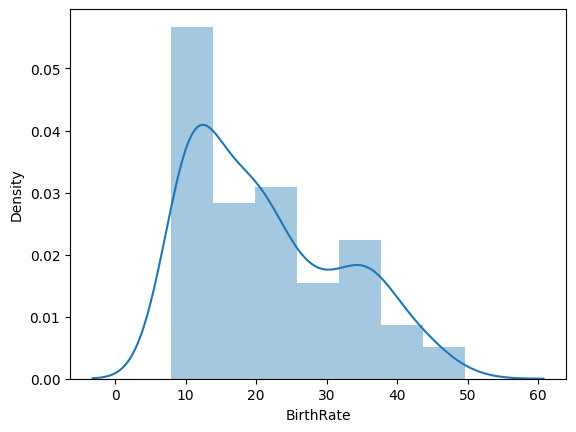

In [100]:
sns.distplot(df['BirthRate'])

<Axes: xlabel='BirthRate', ylabel='IncomeGroup'>

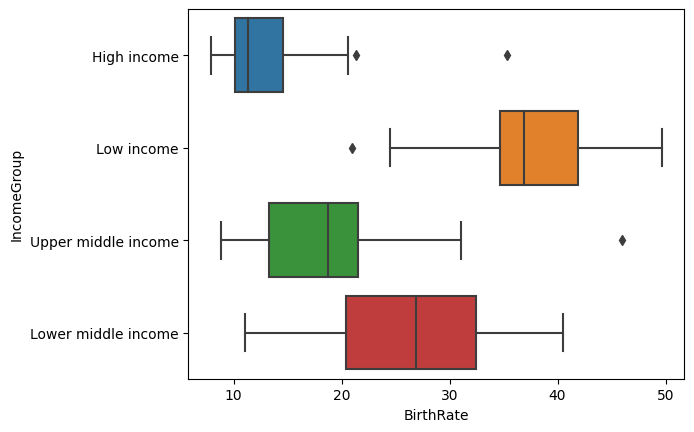

In [101]:
sns.boxplot(data=df,x=df['BirthRate'],y=df['IncomeGroup'])

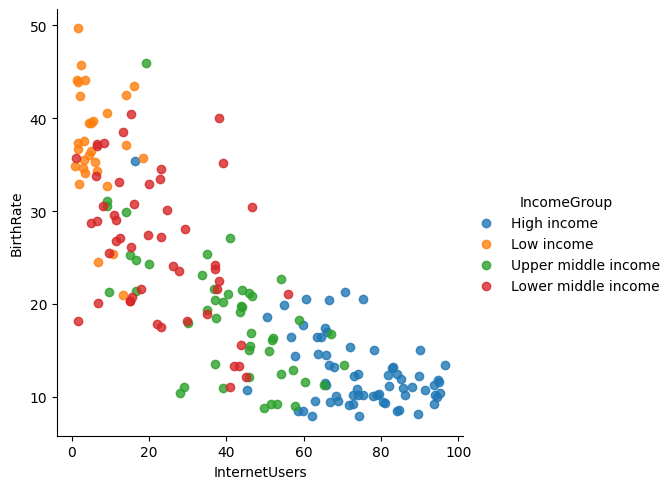

In [102]:
sns.lmplot(data=df,y='BirthRate',x='InternetUsers',hue='IncomeGroup',fit_reg=False)

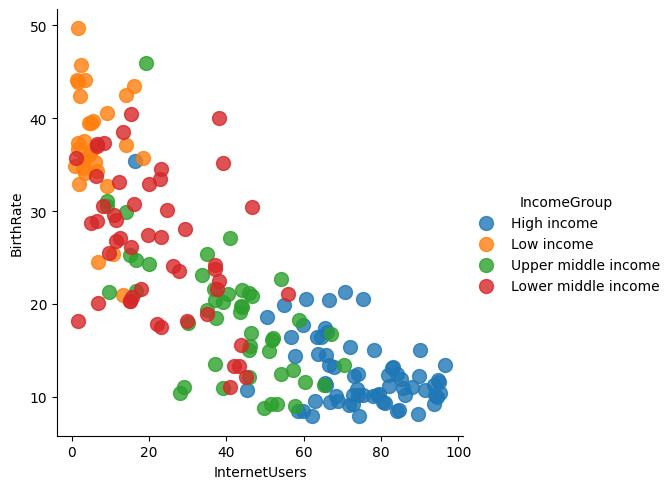

In [103]:
sns.lmplot(data=df,y='BirthRate',x='InternetUsers',hue='IncomeGroup',fit_reg=False,scatter_kws={'s':100})